In [1]:
import matplotlib.pyplot as plt
import numpy as np
from functions.CreateYarn import CreateYarn
from functions.CreateComposite import CreateComposite

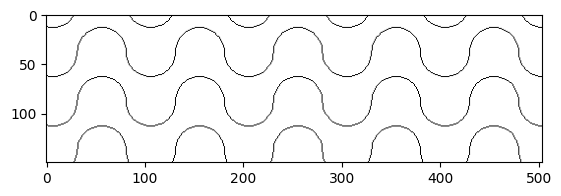

In [2]:
# load png 

path_img = "img/image.png"

#  matplot lib
img = plt.imread(path_img)
# white and black
img = np.mean(img, axis=2)
img = img.T[0:150]

# aspect 
ratio = img.shape[0]/img.shape[1]



plt.imshow(img, cmap='gray')
#aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

In [3]:
!rm *.brep *.inp

In [4]:
# cualquier curva periodica puede ser describida por una serie de fourier


def theta(x):
    return 0.5 * (np.tanh(10*x) + 1)

r = 5

def fc1(x):

    x = x % (4*r)
    term1 = np.sqrt(np.maximum(0, r**2 - (x - r)**2)) * theta(2 * r - x)
    term2 = np.sqrt(np.maximum(0, r**2 - (x - 3 * r)**2)) * theta(x - 2 * r)
    return term1 - term2

rep = 2
x0 = r
x12 = np.linspace(x0,x0+rep*4*r,2000)
y12 = fc1(x12)


(-3.0, 3.0)

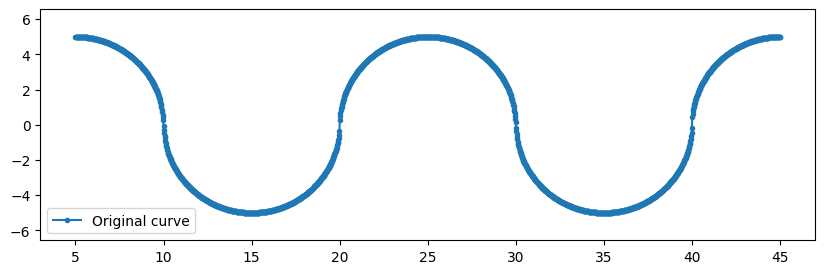

In [5]:

fig = plt.figure()
fig.set_size_inches(10, 3)
# compute fourier coefficients
plt.plot(x12, y12, '.-', label='Original curve')
plt.legend()
# aspect ratio equal
plt.axis('equal')
plt.ylim(-3,3)


In [6]:
x = x12
y = y12
z = 0*x12

trajs = np.array([x, y, z]).T
radius = 1
file = "yarn.brep"

CreateYarn({"trajs": trajs, 
            "radius": radius, 
            "num_points": 150,
            "file": file})

[CreateYarn] angle -7.628361618822653e-15 º
[CreateYarn] radius 1
[CreateYarn] radius/np.cos(angle) 1.0
[CreateYarn] d0 0.5


In [7]:
CreateComposite({
    "yarn_file": file,
    "radius"   : radius,
    "file"     : "composite.inp",
    "trajs"   : trajs,
    "h"       : 2*r,
    "Ny"      : 2,
    "verbose" : True
})

In [8]:
from djccx.inp.inp import inp

Wine está instalado. Versión: wine-9.0
Wine is installed. Calculix will be run with windows binary


In [9]:
inp_f = inp("composite.inp")
inp_f.remove_by_type(2)
inp_f.remove_by_type(1)

inp_f.print("composite_no_solid.inp")

In [10]:
young = 2960
imaterial = inp_f.CreateElasticMaterial("elastic",young,0.0)
allelset  = inp_f.CreateElsetAll()

inp_f.CreateSolidSection(allelset,imaterial)
istep = inp_f.CreateStaticStep(nlgeom=True)


In [11]:
import os
join = os.path.join
inflation_folder = join("output")

if not os.path.exists(inflation_folder):
    os.makedirs(inflation_folder)

In [12]:
frd = inp_f.run(inflation_folder)

Running Calculix at:  output
Output file:  /home/djoroya/projects/CITISENS/CITISENS_Composite/output/out.txt
Command:
 wine /home/djoroya/projects/CITISENS/CITISENS_Composite/.conda/lib/python3.13/site-packages/djccx/bin/ccx_dynamic.exe main > out.txt
Error reading cvf file

pid:  705459 

Calculix finished



IndexError: list index out of range